In [3]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
def set_seed(seed: int):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo


set_seed(25)

In [7]:
# Load datasets
df = pd.read_csv("../sbsppdaa24/train_radiomics_hipocamp.csv")

Correlação com Transition:
 Filter
Transition             1.000000
Age                   -0.468264
Sex                    0.629632
diagnostics            0.160067
exponential            0.077110
gradient               0.023519
lbp-2D                 0.138681
lbp-3D-k               0.423318
lbp-3D-m1              0.139572
lbp-3D-m2              0.139193
log-sigma-1-0-mm-3D    0.102297
log-sigma-2-0-mm-3D    0.079032
log-sigma-3-0-mm-3D    0.224698
log-sigma-4-0-mm-3D    0.278310
log-sigma-5-0-mm-3D    0.159891
logarithm              0.204782
original               0.169864
square                 0.142801
squareroot             0.196260
wavelet-HHH            0.135781
wavelet-HHL            0.132395
wavelet-HLH            0.121237
wavelet-HLL            0.153352
wavelet-LHH            0.094702
wavelet-LHL            0.076773
wavelet-LLH            0.191500
wavelet-LLL            0.171881
Name: Transition, dtype: float64
Heatmap salvo em: correlation_heatmap_label_encoding.png


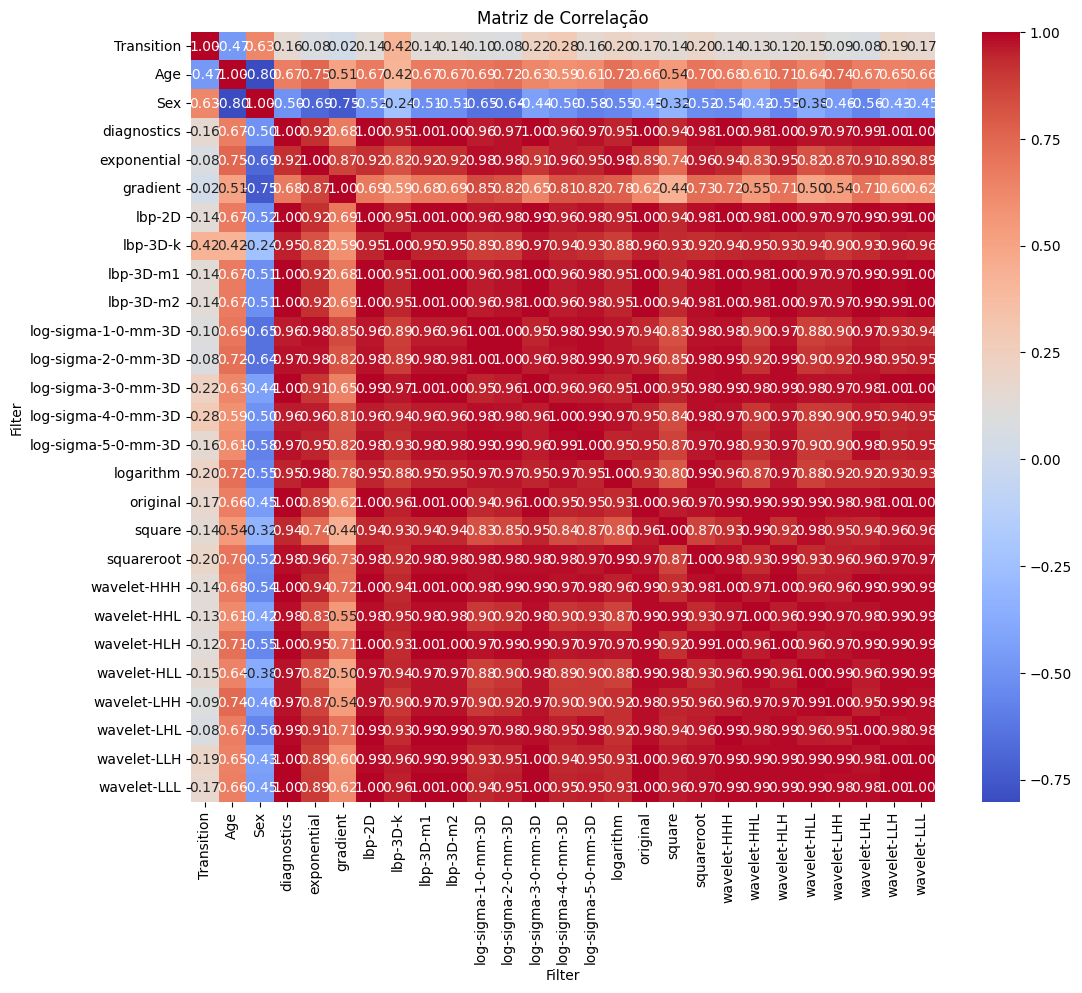

In [16]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Identificar os filtros no nome das colunas
# df_melted = df.melt(id_vars=["Transition"], var_name="Feature", value_name="Value")

# # Extrair o filtro do nome da Feature
# df_melted["Filter"] = df_melted["Feature"].str.split("_").str[0]

# # Converter 'Value' para numérico
# df_melted["Value"] = pd.to_numeric(df_melted["Value"], errors="coerce")

# # Remover valores nulos, se existirem
# df_melted = df_melted.dropna(subset=["Value"])

# # Pivotar para reorganizar os dados (uma coluna por filtro)
# df_grouped = df_melted.groupby(["Transition", "Filter"], as_index=False)["Value"].mean()
# df_filters = df_grouped.pivot(index="Transition", columns="Filter", values="Value").reset_index()

# # Certificar-se de que 'Transition' é numérica
# df_filters["Transition"] = pd.to_numeric(df_filters["Transition"], errors="coerce")

# # Calcular a matriz de correlação
# correlation_matrix = df_filters.corr()

# # Visualizar a correlação entre filtros e a coluna Transition
# correlation_with_target = correlation_matrix["Transition"]
# print("Correlação com Transition:\n", correlation_with_target)

# # Heatmap da matriz de correlação
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Matriz de Correlação")

# # Salvar a imagem
# output_path = "correlation_heatmap.png"
# plt.savefig(output_path, dpi=300, bbox_inches="tight")
# print(f"Heatmap salvo em: {output_path}")

# # Mostrar o gráfico
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Exemplo: Estrutura inicial de 'df' (substitui pelo teu DataFrame)
# df = pd.read_csv("dataset.csv")

# Melt para reorganizar as colunas
df_melted = df.melt(id_vars=["Transition"], var_name="Feature", value_name="Value")

# Extrair o filtro do nome da Feature
df_melted["Filter"] = df_melted["Feature"].str.split("_").str[0]

# Converter 'Value' para numérico
df_melted["Value"] = pd.to_numeric(df_melted["Value"], errors="coerce")

# Remover valores nulos, se existirem
df_melted = df_melted.dropna(subset=["Value"])

# Pivotar para reorganizar os dados (uma coluna por filtro)
df_grouped = df_melted.groupby(["Transition", "Filter"], as_index=False)["Value"].mean()
df_filters = df_grouped.pivot(index="Transition", columns="Filter", values="Value").reset_index()

# Aplicar Label Encoding na coluna 'Transition'
label_encoder = LabelEncoder()
df_filters["Transition"] = label_encoder.fit_transform(df_filters["Transition"])

# Calcular a matriz de correlação
correlation_matrix = df_filters.corr()

# Visualizar a correlação entre filtros e a coluna Transition
correlation_with_target = correlation_matrix["Transition"]
print("Correlação com Transition:\n", correlation_with_target)

# Heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")

# Salvar a imagem
output_path = "correlation_heatmap_label_encoding.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
print(f"Heatmap salvo em: {output_path}")

# Mostrar o gráfico
plt.show()

['ID',
 'Image',
 'Mask',
 'diagnostics_Versions_PyRadiomics',
 'diagnostics_Versions_Numpy',
 'diagnostics_Versions_SimpleITK',
 'diagnostics_Versions_PyWavelet',
 'diagnostics_Versions_Python',
 'diagnostics_Configuration_Settings',
 'diagnostics_Configuration_EnabledImageTypes',
 'diagnostics_Image-original_Hash',
 'diagnostics_Image-original_Spacing',
 'diagnostics_Image-original_Size',
 'diagnostics_Mask-original_Hash',
 'diagnostics_Mask-original_Spacing',
 'diagnostics_Mask-original_Size',
 'diagnostics_Mask-original_BoundingBox',
 'diagnostics_Mask-original_CenterOfMassIndex',
 'diagnostics_Mask-original_CenterOfMass']

In [ ]:
# filtrar colunas para ficar so com colunas que começem por wavelet- ...